In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [4]:
m1=3
m2=5
sigma1=5
sigma2=1

Функція оцінки щільності ймовірностей для графіка залежності

In [5]:
def prob_func(x, m, s) :
    return (1/(np.sqrt (2*np.pi)*s))*np.exp((-1)* (x-m) **2)/ (2*s**2)

Створю масив точок (N = 200) по осі 0х, розташованих з рівним кроком в діапазоні [xmin, xmax]. Верхню хmax і нижню хmin межі діапазону визначаю за правилом «трьох сигм», 
згідно з яким випадкова величина х, розподілена за нормальним законом, знаходиться в інтервалі значень m‡3σ імовірністю більше 0, m-3σ<=m<=m+3σ

Вважаємо, що випадкові значення параметра х будуть лежати в діапазоні [x1min, x1maх], якщо спостерігається клас 1 (х Є a1), і в діапазоні [х2min, x2max], якщо спостерігається клас 2 (х Є a2)
Визначимо довірчі інтервали щоб знайти проміжок для значень х

In [6]:
x1_min=m1-3* sigma1
x1_max=m1+3*sigma1
x2_min=m2-3*sigma2
x2_max=m2+3* sigma2

In [7]:
print(x1_min, x1_max)
print(x2_min, x2_max)

-12 18
2 8


In [8]:
Xmin=min(x1_min,x2_min)
Xmax=max (x1_max, x2_max)
print ('xmin={}, xmax = {}' . format (Xmin, Xmax))

xmin=-12, xmax = 18


Будуємо графік щільності на проміжку значень х

In [9]:
int = np.linspace(Xmin,Xmax, 200)
fx1=[]
fx2=[]
for i in range (200):
    fx1.append(prob_func(int [i], m1, sigma1))
    fx2.append(prob_func(int [i], m2, sigma2))


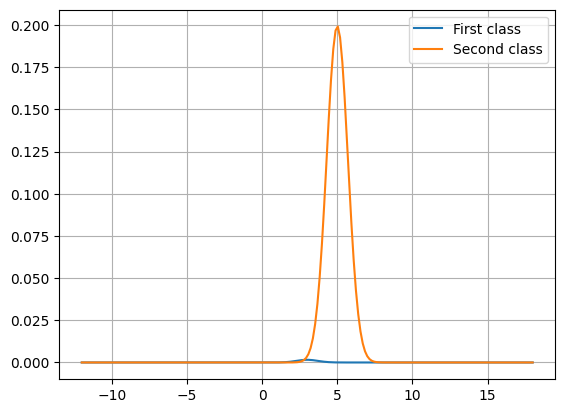

In [10]:
fig,ax=plt.subplots ()
ax.plot(int, fx1, label="First class")
ax.plot(int, fx2,label="Second class")
ax.grid()
ax.legend()
plt.show()

Обрахуємо пороги прийняття рішень за критерієм макс правдоподібності

In [11]:
d1=sigma1**2
d2=sigma2**2
a = d2-d1
b = 2*m2* d1-2*m1 * d2
c = (m1 **2) *d2 - (m2**2)*d1 - 2*d1*d2*(np.log(sigma2/sigma1))

In [12]:
xp1=(-b+np.sqrt (b**2-4*a* c))/ (2*a)
xp2=(-b-np.sqrt (b**2-4*a*c))/ (2*a)
print ( 'Отримані пороги:')
print (xp1, '\n' ,xp2)

Отримані пороги:
3.205407146813883 
 6.961259519852784


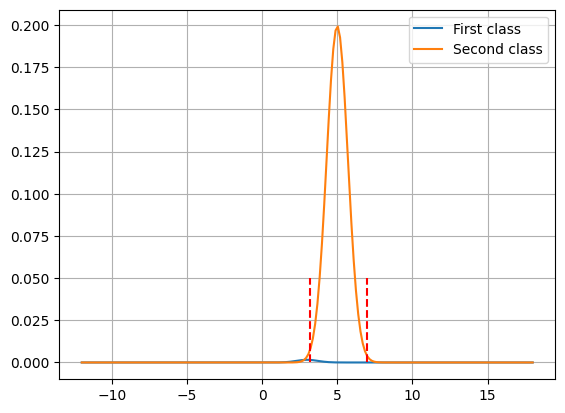

In [15]:
fig,ax = plt.subplots ()
ax.plot(int,fx1,label="First class")
ax.plot(int,fx2,label="Second class")
ax.grid()
ax.legend()
plt.plot([xp1]*2, np.linspace(0, 0.05, 2),'--',color='red')
plt.plot([xp2]*2, np.linspace(0, 0.05, 2),'--',color='red')
plt.show()

Визначений поріг належить до інтервалу класу [ -12,18]. Для оцінки ефективності вирішального правила розрахуємо теоретичні величини ймовірностей помилок розпізнавання.

In [16]:
P21=spi.quad(prob_func, Xmin, xp1, args=(m2, sigma2)) [0] + spi.quad(prob_func, xp2, Xmax, args=(m2,sigma2)) [0]
P12=spi.quad(prob_func, xp1, xp2, args=(m1, sigma1)) [0]
print('Ймовірність віднести спостережувальну ознаку до класу а1, коли вона насправді належить класу a2 ', round(P21,3))
print('Ймовірність прийняття рішення на користь класу а2, коли в дійсності спостерігається клас a1',round(P12,3))


Ймовірність віднести спостережувальну ознаку до класу а1, коли вона насправді належить класу a2  0.003
Ймовірність прийняття рішення на користь класу а2, коли в дійсності спостерігається клас a1 0.001


Імовірність правильного розпізнавання дає можливість стверджувати що клас буде розпізнано правильно

In [17]:
P=1-0.5* (P21+P12)
print(round( P,3))

0.998


Побудуємо вирішальне правило за критерієм макс апостеріорної ймовірності

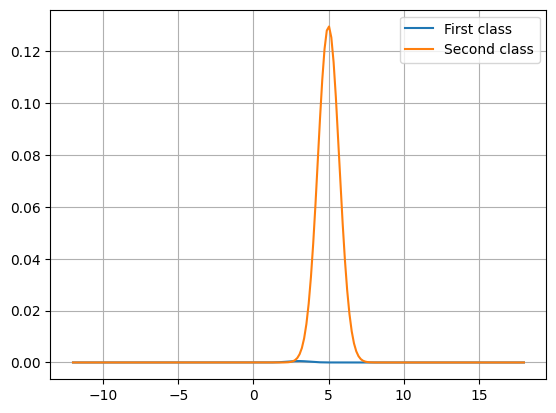

In [18]:
p1=0.35
p2=0.65
fx11=[]
fx22=[]
for i in range (200):
    fx11.append(p1 * prob_func(int[i], m1, sigma1))
    fx22.append(p2 * prob_func(int[i], m2, sigma2))
fig,ax =plt.subplots()
ax.plot(int, fx11,label="First class")
ax.plot(int, fx22,label="Second class")
ax.grid()
ax.legend()
plt.show()

Апостеріорні ймовірності q1, q2

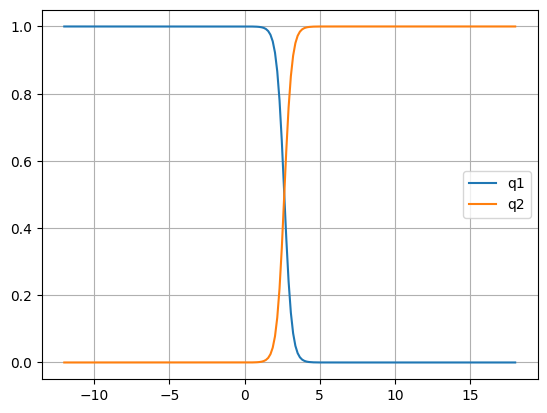

In [19]:
q1=[fx11[i]/(fx11[i]+fx22[i]) for i in range (200)]
q2=[fx22[i]/(fx11[i]+fx22[i]) for i in range (200)]
fig,ax =plt.subplots ()
ax.plot (int, q1, label="q1")
ax.plot (int, q2, label="q2")
ax.grid()
ax. legend()
plt.show()


За критерієм макс апостеріорної ймовірності визначимо пороги приняття рішень

In [20]:
c1=(m1**2)*d2 -(m2**2) *d1-2*d1*d2*(np. log ((sigma2*p1) /(sigma1*p2)))

In [21]:
xp11=(-b +np.sqrt(b**2-4*a*c1))/(2*a)
xp22=(-b -np.sqrt(b**2-4*a*c1))/(2*a)
print ("Пороги")
print (xp11,'\n',xp22)

Пороги
2.888732736521137 
 7.2779339301455295


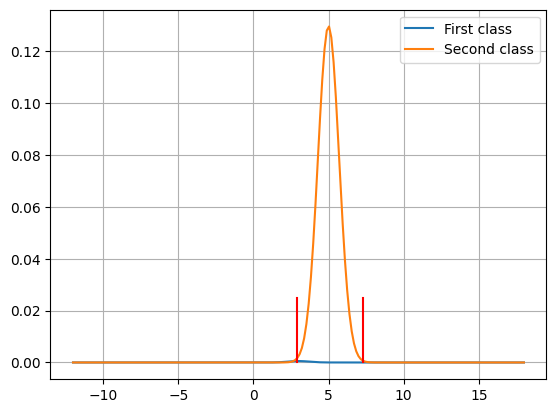

In [30]:
fig,ax = plt.subplots ()
ax.plot(int,fx11,label="First class")
ax.plot(int,fx22,label="Second class")
ax.grid()
ax.legend()
plt.plot([xp11]*2, np.linspace(0, 0.025, 2),'-',color='red')
plt.plot([xp22]*2, np.linspace(0, 0.025, 2),'-',color='red')
plt.show()

Для оцінки ефективності вирішального правила розрахуємо теоретичні величини ймовірностей помилок розпізнавання

In [31]:
p11_2=spi.quad(prob_func, Xmin, xp11, args=(m2, sigma2)) [0] + spi.quad(prob_func, xp22, Xmax, args=(m2,sigma2)) [0]
p22_2=spi.quad(prob_func, xp11, xp22, args=(m1, sigma1)) [0]
print('Ймовірність віднести спостережувальну ознаку до класу а1, коли вона насправді належить класу a2 ', round(p11_2,3))
print('Ймовірність прийняття рішення на користь класу а2, коли в дійсності спостерігається клас a1',round(p22_2,3))

Ймовірність віднести спостережувальну ознаку до класу а1, коли вона насправді належить класу a2  0.001
Ймовірність прийняття рішення на користь класу а2, коли в дійсності спостерігається клас a1 0.002


Ймовірність правильного розпізнавання

In [32]:
P=1-0.5*(p11_2+p22_2)
print(round (P,3))

0.999
